In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
# verifies successfule load with some 5 random selected records
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
371,2014,FORD,F150,PICKUP TRUCK - STANDARD,6.2,8,AS6,X,18.3,12.9,15.9,18,366
373,2014,FORD,F150 4X4,PICKUP TRUCK - STANDARD,3.5,6,AS6,X,15.4,11.0,13.4,21,308
762,2014,MERCEDES-BENZ,ML 350 4MATIC FFV,SUV - STANDARD,3.5,6,AS7,Z,13.4,10.5,12.1,23,278
560,2014,JAGUAR,XJL SUPERCHARGED,FULL-SIZE,5.0,8,AS8,E,20.6,13.6,17.5,16,280
325,2014,DODGE,DURANGO AWD FFV,SUV - STANDARD,3.6,6,A8,E,17.7,13.0,15.6,18,250


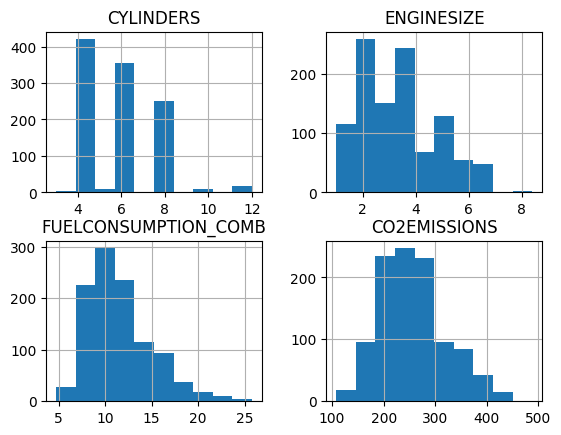

In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

viz = cdfviz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

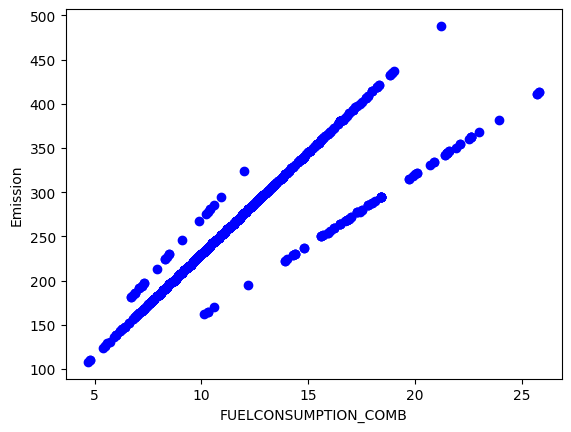

In [17]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

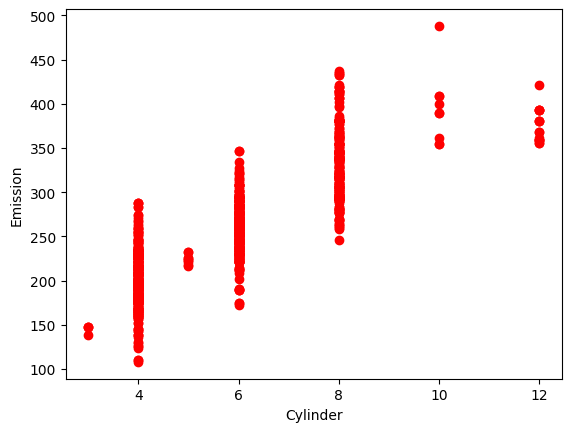

In [23]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='red')
plt.xlabel('Cylinder')
plt.ylabel('Emission')
plt.show()

In [26]:
# use x as predictor and y as the target var
# preparing data
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

from sklearn.model_selection import train_test_split
# output will be one dimensional numpy arrays or vectors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
type(X_train), np.shape(X_train), np.shape(X_test)

from sklearn import linear_model
#creating the model
regressor = linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)

print('Coefficients: ', regressor.coef_[0])
print('Intercept', regressor.intercept_)

Coefficients:  38.992978724434074
Intercept 126.28970217408721


Text(0, 0.5, 'Emission')

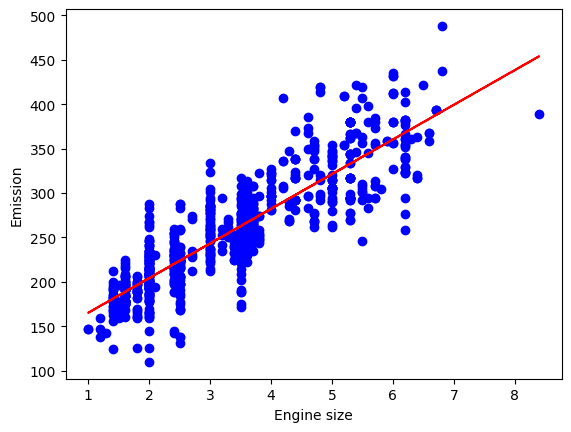

In [27]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = regressor.predict(X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2-score: %.2f" % r2_score(y_test, y_pred))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


Text(0, 0.5, 'Emission')

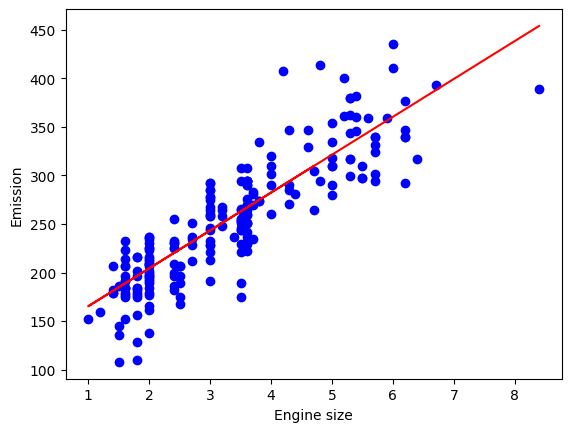

In [29]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
# use x as predictor and y as the target var
# preparing data
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

# output will be one dimensional numpy arrays or vectors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
type(X_train), np.shape(X_train), np.shape(X_test)

from sklearn import linear_model
#creating the model
regressor = linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)

print('Coefficients: ', regressor.coef_[0])
print('Intercept', regressor.intercept_)

Coefficients:  16.18090078119919
Intercept 69.10302617988452


In [ ]:
y_pred = regressor.predict(X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2-score: %.2f" % r2_score(y_test, y_pred))


Mean absolute error: 20.44
Mean squared error: 797.43
Root mean squared error: 28.24
R2-score: 0.81
